In [1]:
# import required libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
import json
from sklearn import preprocessing

In [2]:
# read original dataset from file
df = pd.read_csv('/home/fede/workspace/DataLab/python/data/payments_w_city_weather.txt', sep='|', header=0, decimal=",")

In [3]:
remap = {
    'LUNES': 1,
    'MARTES': 2,
    'MIÉRCOLES': 3,
    'JUEVES': 4, 
    'VIERNES': 5,
    'SÁBADO': 6,
    'DOMINGO': 7
}
df['NUM_DIA_SEMANA'] = df['DIA_SEMANA'].map(remap)

In [4]:
df.FRANJA_HORARIA = pd.to_numeric(df.FRANJA_HORARIA.str.slice(0,2))
df.IMPORTE = df.IMPORTE.astype(float)
df.LAT_CLIENTE = df.LAT_CLIENTE.astype(float)
df.LON_CLIENTE = df.LON_CLIENTE.astype(float)
df.HUMEDAD = df.HUMEDAD.astype(float)
df.SENSAC_TERMICA = df.SENSAC_TERMICA.astype(float)
df.TEMPERATURA = df.TEMPERATURA.astype(float)

In [5]:
df.head()

,CP_CLIENTE,CP_COMERCIO,SECTOR,DIA,FRANJA_HORARIA,IMPORTE,NUM_OP,CIUDAD_CLIENTE,LAT_CLIENTE,LON_CLIENTE,...,LAT_COMERCIO,LON_COMERCIO,FECHA,TIMESTAMP,HUMEDAD,SENSAC_TERMICA,TEMPERATURA,TIEMPO_DESC,DIA_SEMANA,NUM_DIA_SEMANA
0,46001,46001,RESTAURACION,2015-01-02,16,2.70,1,Valencia,39.474176,-0.380721,...,39.4741757,-0.380721,2015-01-02 16:00:00,1420210800,0.33,16.99,16.99,Nublado,VIERNES,5
1,46001,46001,RESTAURACION,2015-01-02,20,20.00,1,Valencia,39.474176,-0.380721,...,39.4741757,-0.380721,2015-01-02 20:00:00,1420225200,0.73,6.26,7.08,Despejado,VIERNES,5
2,46001,46001,RESTAURACION,2015-01-03,22,13.50,1,Valencia,39.474176,-0.380721,...,39.4741757,-0.380721,2015-01-03 22:00:00,1420318800,0.59,8.27,9.81,Despejado,SÁBADO,6
3,46001,46001,RESTAURACION,2015-01-06,22,16.80,1,Valencia,39.474176,-0.380721,...,39.4741757,-0.380721,2015-01-06 22:00:00,1420578000,0.95,7.42,7.42,Nublado,MARTES,2
4,46001,46001,RESTAURACION,2015-01-07,14,16.25,1,Valencia,39.474176,-0.380721,...,39.4741757,-0.380721,2015-01-07 14:00:00,1420635600,0.52,15.48,15.48,Despejado,MIÉRCOLES,3


In [6]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df.select_dtypes(include=numerics)

In [7]:
del newdf['CP_CLIENTE']
del newdf['CP_COMERCIO']
del newdf['TIMESTAMP']
del newdf['LAT_CLIENTE']
del newdf['LON_CLIENTE']
del newdf['HUMEDAD']
del newdf['SENSAC_TERMICA']
newdf.head()

,FRANJA_HORARIA,IMPORTE,NUM_OP,TEMPERATURA,NUM_DIA_SEMANA
0,16,2.70,1,16.99,5
1,20,20.00,1,7.08,5
2,22,13.50,1,9.81,6
3,22,16.80,1,7.42,2
4,14,16.25,1,15.48,3


In [8]:
dataset_array = newdf.values
print(dataset_array.dtype)
print(dataset_array)

float64
[[  16.      2.7     1.     16.99    5.  ]
 [  20.     20.      1.      7.08    5.  ]
 [  22.     13.5     1.      9.81    6.  ]
 ..., 
 [  18.     30.4     1.     26.54    5.  ]
 [  20.    124.97    1.     20.08    5.  ]
 [  18.     25.22    1.     20.1     3.  ]]


In [27]:
df_norm = newdf.copy()

In [28]:
df_norm.FRANJA_HORARIA = preprocessing.scale(df_norm.FRANJA_HORARIA.astype('float64'))
df_norm.IMPORTE = preprocessing.scale(df_norm.IMPORTE.astype('float64'))
df_norm.NUM_OP = preprocessing.scale(df_norm.NUM_OP.astype('float64'))
df_norm.TEMPERATURA = preprocessing.scale(df_norm.TEMPERATURA.astype('float64'))
df_norm.NUM_DIA_SEMANA = preprocessing.scale(df_norm.NUM_DIA_SEMANA.astype('float64'))

In [29]:
df_norm.describe()

,FRANJA_HORARIA,IMPORTE,NUM_OP,TEMPERATURA,NUM_DIA_SEMANA
count,3.428537e+06,3.428537e+06,3.428537e+06,3.428537e+06,3.428537e+06
mean,9.981686e-17,-3.891042e-16,5.869142e-18,-1.292761e-15,4.110057e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.386910e+00,-5.106078e-01,-2.389458e-01,-3.167310e+00,-1.521092e+00
25%,-6.070476e-01,-3.830969e-01,-2.389458e-01,-7.803210e-01,-9.915886e-01
50%,-1.437372e-01,-2.503779e-01,-2.389458e-01,-6.060299e-02,6.741735e-02
75%,7.828835e-01,1.011239e-02,-2.389458e-01,8.099993e-01,5.969203e-01
max,1.709504e+00,1.502977e+02,3.739357e+01,3.153232e+00,1.655926e+00


In [36]:
from sklearn.cross_validation import train_test_split
data_train, data_test = train_test_split(df_norm, test_size=.3, random_state=1234)

In [44]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
clusters = range(1,25)
meandist = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(data_train)
    predict = model.predict(data_train)
    meandist.append(sum(np.min(cdist(data_train, model.cluster_centers_, 'euclidean'), axis=1))/data_train.shape[0])

In [45]:
plt.plot(clusters, meandist)
plt.xlabel('number clusters')
plt.ylabel('distance')
plt.title('select k')

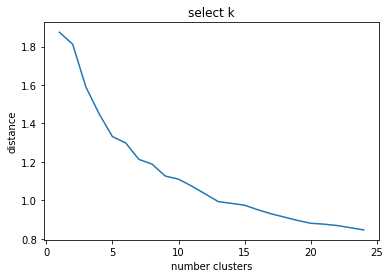

In [46]:
plt.show()

In [49]:
model9 = KMeans(n_clusters=4)
model9.fit(data_train)
predict = model9.predict(data_train)

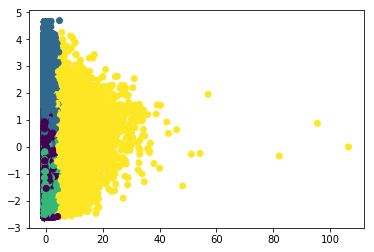

In [50]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_plot = pca_2.fit_transform(data_train)
plt.scatter(x=pca_plot[:,0], y=pca_plot[:,1], c=model9.labels_)
plt.show()

In [59]:
from pandas import DataFrame
data_train.reset_index(inplace=True, level=0)
index = list(data_train.index)
labels = list(model9.labels_)
newlist = dict(zip(index, labels))
clust = DataFrame.from_dict(newlist, orient='index')

In [68]:
clust.columns = ['CLUSTER']

In [76]:
data_train['CLUSTER'] = clust.CLUSTER

/home/fede/.conda/envs/env_python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [77]:
print(data_train.groupby('CLUSTER').mean())

                index  FRANJA_HORARIA   IMPORTE    NUM_OP  TEMPERATURA  \
CLUSTER                                                                  
0        1.708821e+06        0.415916 -0.068738 -0.086783     0.227709   
1        1.650786e+06       -1.227010 -0.069929 -0.088054    -0.789080   
2        1.743927e+06        0.298634 -0.074878 -0.093823     0.236832   
3        2.083751e+06        0.017744  4.718867  5.930615    -0.006764   

         NUM_DIA_SEMANA  
CLUSTER                  
0              0.793419  
1              0.128179  
2             -1.011990  
3             -0.123573  


In [30]:
from sklearn import cluster

km = cluster.KMeans(n_clusters = 3)
km.fit(df_norm)
prediction = km.predict(df_norm)

In [31]:
prediction

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [32]:
df['CLUSTER'] = prediction

In [33]:
df[df.CLUSTER==0].describe(include='all')

,CP_CLIENTE,CP_COMERCIO,SECTOR,DIA,FRANJA_HORARIA,IMPORTE,NUM_OP,CIUDAD_CLIENTE,LAT_CLIENTE,LON_CLIENTE,...,LON_COMERCIO,FECHA,TIMESTAMP,HUMEDAD,SENSAC_TERMICA,TEMPERATURA,TIEMPO_DESC,DIA_SEMANA,NUM_DIA_SEMANA,CLUSTER
count,1.477541e+06,1.477541e+06,1477541,1477541,1.477541e+06,1.477541e+06,1.477541e+06,1477541,1.477541e+06,1.477541e+06,...,1477541,1477541,1.477541e+06,1.477541e+06,1.477541e+06,1.477541e+06,1477541,1477541,1.477541e+06,1477541.0
unique,NaN,NaN,11,312,NaN,NaN,NaN,224,NaN,NaN,...,21,3742,NaN,NaN,NaN,NaN,8,3,NaN,NaN
top,NaN,NaN,ALIMENTACION,2016-01-04,NaN,NaN,NaN,Valencia,NaN,NaN,...,-0.380721,2016-01-04 18:00:00,NaN,NaN,NaN,NaN,Despejado,MIÉRCOLES,NaN,NaN
freq,NaN,NaN,316741,8651,NaN,NaN,NaN,709601,NaN,NaN,...,189415,1801,NaN,NaN,NaN,NaN,1054985,507185,NaN,NaN
mean,4.623570e+04,4.601211e+04,NaN,NaN,1.470119e+01,5.012942e+01,1.268357e+00,NaN,3.945269e+01,-4.527163e-01,...,NaN,NaN,1.452618e+09,5.706883e-01,2.019971e+01,2.008637e+01,NaN,NaN,2.017727e+00,0.0
std,3.046186e+02,7.299354e+00,NaN,NaN,4.004804e+00,6.978794e+01,7.892973e-01,NaN,1.494500e-01,1.784465e-01,...,NaN,NaN,1.813825e+07,1.724909e-01,7.120749e+00,6.745222e+00,NaN,NaN,8.176090e-01,0.0
min,4.600100e+04,4.600100e+04,NaN,NaN,0.000000e+00,1.000000e-02,1.000000e+00,NaN,3.875612e+01,-1.462804e+00,...,NaN,NaN,1.420412e+09,1.700000e-01,-2.900000e+00,-1.400000e-01,NaN,NaN,1.000000e+00,0.0
25%,4.601700e+04,4.600600e+04,NaN,NaN,1.200000e+01,1.367000e+01,1.000000e+00,NaN,3.943929e+01,-4.643906e-01,...,NaN,NaN,1.436868e+09,4.400000e-01,1.479000e+01,1.479000e+01,NaN,NaN,1.000000e+00,0.0
50%,4.611400e+04,4.601100e+04,NaN,NaN,1.400000e+01,2.860000e+01,1.000000e+00,NaN,3.947041e+01,-3.960275e-01,...,NaN,NaN,1.452676e+09,5.500000e-01,1.967000e+01,1.967000e+01,NaN,NaN,2.000000e+00,0.0
75%,4.637000e+04,4.601900e+04,NaN,NaN,1.800000e+01,5.700000e+01,1.000000e+00,NaN,3.950132e+01,-3.630670e-01,...,NaN,NaN,1.468253e+09,6.900000e-01,2.573000e+01,2.573000e+01,NaN,NaN,3.000000e+00,0.0


In [34]:
df[df.CLUSTER==1].describe(include='all')

,CP_CLIENTE,CP_COMERCIO,SECTOR,DIA,FRANJA_HORARIA,IMPORTE,NUM_OP,CIUDAD_CLIENTE,LAT_CLIENTE,LON_CLIENTE,...,LON_COMERCIO,FECHA,TIMESTAMP,HUMEDAD,SENSAC_TERMICA,TEMPERATURA,TIEMPO_DESC,DIA_SEMANA,NUM_DIA_SEMANA,CLUSTER
count,1.898358e+06,1.898358e+06,1898358,1898358,1.898358e+06,1.898358e+06,1.898358e+06,1898358,1.898358e+06,1.898358e+06,...,1898358,1898358,1.898358e+06,1.898358e+06,1.898358e+06,1.898358e+06,1898358,1898358,1.898358e+06,1898358.0
unique,NaN,NaN,11,419,NaN,NaN,NaN,224,NaN,NaN,...,21,5023,NaN,NaN,NaN,NaN,7,4,NaN,NaN
top,NaN,NaN,MODA Y COMPLEMENTOS,2016-12-23,NaN,NaN,NaN,Valencia,NaN,NaN,...,-0.380721,2016-12-23 18:00:00,NaN,NaN,NaN,NaN,Despejado,SÁBADO,NaN,NaN
freq,NaN,NaN,361372,8595,NaN,NaN,NaN,871783,NaN,NaN,...,244446,1557,NaN,NaN,NaN,NaN,1360018,564862,NaN,NaN
mean,4.624448e+04,4.601230e+04,NaN,NaN,1.455624e+01,5.070807e+01,1.281945e+00,NaN,3.945307e+01,-4.523589e-01,...,NaN,NaN,1.452538e+09,5.692421e-01,1.989251e+01,1.981236e+01,NaN,NaN,5.322502e+00,1.0
std,3.073512e+02,7.298042e+00,NaN,NaN,4.555945e+00,6.646304e+01,7.774646e-01,NaN,1.476211e-01,1.756362e-01,...,NaN,NaN,1.848920e+07,1.744046e-01,6.843876e+00,6.535845e+00,NaN,NaN,1.027063e+00,0.0
min,4.600100e+04,4.600100e+04,NaN,NaN,0.000000e+00,1.000000e-02,1.000000e+00,NaN,3.875612e+01,-1.462804e+00,...,NaN,NaN,1.420067e+09,1.000000e-01,-3.310000e+00,-1.060000e+00,NaN,NaN,4.000000e+00,1.0
25%,4.601700e+04,4.600600e+04,NaN,NaN,1.200000e+01,1.499000e+01,1.000000e+00,NaN,3.943923e+01,-4.714694e-01,...,NaN,NaN,1.436450e+09,4.400000e-01,1.471000e+01,1.471000e+01,NaN,NaN,4.000000e+00,1.0
50%,4.611900e+04,4.601300e+04,NaN,NaN,1.400000e+01,3.000000e+01,1.000000e+00,NaN,3.947041e+01,-3.960275e-01,...,NaN,NaN,1.452877e+09,5.600000e-01,1.944000e+01,1.944000e+01,NaN,NaN,5.000000e+00,1.0
75%,4.638000e+04,4.601900e+04,NaN,NaN,1.800000e+01,5.927000e+01,1.000000e+00,NaN,3.950432e+01,-3.630670e-01,...,NaN,NaN,1.468159e+09,6.900000e-01,2.499000e+01,2.499000e+01,NaN,NaN,6.000000e+00,1.0


In [35]:
df[df.CLUSTER==2].describe(include='all')

,CP_CLIENTE,CP_COMERCIO,SECTOR,DIA,FRANJA_HORARIA,IMPORTE,NUM_OP,CIUDAD_CLIENTE,LAT_CLIENTE,LON_CLIENTE,...,LON_COMERCIO,FECHA,TIMESTAMP,HUMEDAD,SENSAC_TERMICA,TEMPERATURA,TIEMPO_DESC,DIA_SEMANA,NUM_DIA_SEMANA,CLUSTER
count,52638.000000,52638.000000,52638,52638,52638.000000,52638.000000,52638.000000,52638,52638.000000,52638.000000,...,52638,52638,5.263800e+04,52638.000000,52638.000000,52638.000000,52638,52638,52638.000000,52638.0
unique,NaN,NaN,11,725,NaN,NaN,NaN,188,NaN,NaN,...,21,4700,NaN,NaN,NaN,NaN,9,7,NaN,NaN
top,NaN,NaN,ALIMENTACION,2016-01-05,NaN,NaN,NaN,Valencia,NaN,NaN,...,-0.39602750000000003,2016-12-24 12:00:00,NaN,NaN,NaN,NaN,Despejado,SÁBADO,NaN,NaN
freq,NaN,NaN,37987,176,NaN,NaN,NaN,44956,NaN,NaN,...,7038,54,NaN,NaN,NaN,NaN,39127,9913,NaN,NaN
mean,46078.443102,46014.753942,NaN,NaN,14.671910,596.292079,12.248756,NaN,39.465636,-0.399161,...,NaN,NaN,1.452556e+09,0.568539,19.990849,19.891073,NaN,NaN,3.653824,2.0
std,190.644038,6.769316,NaN,NaN,3.825347,524.503437,8.217072,NaN,0.076557,0.094616,...,NaN,NaN,1.833969e+07,0.167134,6.820990,6.491819,NaN,NaN,1.751189,0.0
min,46001.000000,46001.000000,NaN,NaN,0.000000,11.000000,1.000000,NaN,38.756121,-1.462804,...,NaN,NaN,1.420160e+09,0.100000,-2.900000,-0.140000,NaN,NaN,1.000000,2.0
25%,46011.000000,46009.000000,NaN,NaN,12.000000,286.530000,7.000000,NaN,39.456080,-0.396028,...,NaN,NaN,1.436443e+09,0.450000,14.660000,14.660000,NaN,NaN,2.000000,2.0
50%,46018.000000,46015.000000,NaN,NaN,14.000000,424.735000,12.000000,NaN,39.470414,-0.381898,...,NaN,NaN,1.452625e+09,0.560000,19.410000,19.410000,NaN,NaN,4.000000,2.0
75%,46025.000000,46020.000000,NaN,NaN,18.000000,765.892500,17.000000,NaN,39.484527,-0.372482,...,NaN,NaN,1.468051e+09,0.680000,25.270000,25.270000,NaN,NaN,5.000000,2.0
